# AI Summerschool Data Science Workshop

Auteurs: Mark Verschuren & Aron Jeurninck

Datum: 12 september 2019

Dit script is de uitgangsbasis voor de workshop van AI Summerschool. In dit script ga je zelf aan de slag met de "Census Income Data Set". De business case is beschreven in het bijbehorende slidedeck. In het slidedeck is tevens wat achtergrond te vinden over bepaalde technieken. In het script zijn op enkele plaatsen verwijzingen opgenomen naar naslagwerk voor bepaalde technieken. 

Het script volgt de volgorde zoals in het slidedeck is aangegeven.

### Installatie

Gebruik de !pip install <package> commands voor het installeren van packages. Gebruik de "!pip install --user --requirement requirements.txt" command voor het installeren van alle requirements tegelijk. Dit kan wat langer duren.

In [ ]:
#!pip install pandas
#!pip install numpy
#!pip install math
#!pip install warnings
#!pip install sklearn
#!pip install matplotlib
#!pip install seaborn
#!pip install imblearn

In [ ]:
#!pip install --user --requirement requirements.txt

# Inladen packages en data

In dit blok worden de benodigde packages ingeladen met ingebouwde modules in Python. De data (format .csv) wordt ingeladen.

In [3]:
# Importing libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import math

from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.linear_model import SGDClassifier

In [4]:
data_set = pd.read_csv('adult.csv')
#test_data = pd.read_csv('adult_test.csv', sep=';')

# Data bekijken

In dit blok doen we een eerste analyse op de data. Welke variabelen zijn er beschikbaar en in welk format? Wat is de verdeling van elke numerieke variabele en welke waarden zijn er beschikbaar in de categorische variabelen? Tevens checken we de data op lege waarden (NaN).

In [5]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
data_set.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### Categorische data variabelen

In [7]:
var_cat = set(data_set.columns)
for var in data_set.describe().columns:
    var_cat.remove(var)
var_cat

{'education',
 'income',
 'marital.status',
 'native.country',
 'occupation',
 'race',
 'relationship',
 'sex',
 'workclass'}

### Numerieke data variabelen

In [8]:
set(data_set.describe().columns)

{'age',
 'capital.gain',
 'capital.loss',
 'education.num',
 'fnlwgt',
 'hours.per.week'}

### Check voor lege waardes.

In [9]:
#Check voor NaN waarden.
if data_set.isna().sum().sum()==0:
    print('Geen NaN waardes in de data.')

Geen NaN waardes in de data.


### Check voor missing values '?' in categorische data

In [10]:
for kolom in data_set.columns[1:]:
    try:
        print('Aantal ? in kolom '+kolom+": "+str(data_set[kolom].value_counts()['?']))
    except:
        'geen ? in kolom'

Aantal ? in kolom workclass: 1836
Aantal ? in kolom occupation: 1843
Aantal ? in kolom native.country: 583


We halen de missing values uit de dataset.

In [11]:
data_set = data_set[(data_set.workclass != '?') & (data_set.occupation != '?') & (data_set['native.country'] != '?')]

### Visualisatie en analyse van enkele variabelen
In onderstaande plots wordt er gekeken naar het verband tussen de variabelen 'education' en 'occupation' met 'income' (gemiddeld).   

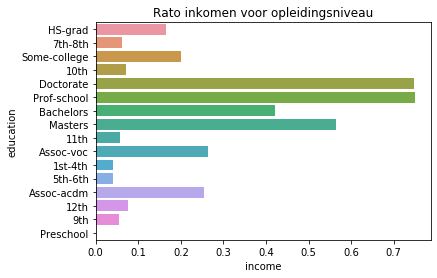

In [12]:
sns.barplot(x=data_set['income'].map({'<=50K': 0, '>50K': 1}).astype(int), y=data_set['education'], ci=None)
plt.grid(False)
plt.title('Rato inkomen voor opleidingsniveau')
plt.show()

Interpretatie: personen met een doctoraat of professioneel onderwijs hebben vaker een hoger inkomen dan €50k. De personen met een opleidingsniveau van 1st-4th verdienen het vaakst onder €50k. 

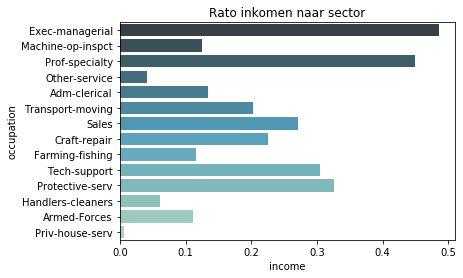

In [13]:
sns.barplot(x=data_set['income'].map({'<=50K': 0, '>50K': 1}).astype(int), y=data_set['occupation'], ci=None, palette='GnBu_d')
plt.title('Rato inkomen naar sector')
plt.grid(False)
plt.show()

We bekijken onderstaand de mogelijke waarden van enkele categorische variabelen.

In [14]:
#Beschikbare waarden voor native country
data_set['native.country'].unique()

array(['United-States', 'Mexico', 'Greece', 'Vietnam', 'China', 'Taiwan',
       'India', 'Philippines', 'Trinadad&Tobago', 'Canada', 'South',
       'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran', 'England',
       'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba', 'Ireland',
       'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic', 'Haiti',
       'Hungary', 'Columbia', 'Guatemala', 'El-Salvador', 'Jamaica',
       'Ecuador', 'France', 'Yugoslavia', 'Portugal', 'Laos', 'Thailand',
       'Outlying-US(Guam-USVI-etc)', 'Scotland'], dtype=object)

In [15]:
#Beschikbare waarden voor marital status
print(data_set['marital.status'].unique())
data_set['marital.status'].value_counts()

['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']


Married-civ-spouse       14065
Never-married             9726
Divorced                  4214
Separated                  939
Widowed                    827
Married-spouse-absent      370
Married-AF-spouse           21
Name: marital.status, dtype: int64

In [16]:
#Beschikbare waarden voor relationship
print(data_set['relationship'].unique())
data_set['relationship'].value_counts()

['Not-in-family' 'Unmarried' 'Own-child' 'Other-relative' 'Husband' 'Wife']


Husband           12463
Not-in-family      7726
Own-child          4466
Unmarried          3212
Wife               1406
Other-relative      889
Name: relationship, dtype: int64

In [17]:
#Beschikbare waarden voor race
print(data_set['race'].unique())
data_set['race'].value_counts()

['White' 'Black' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']


White                 25933
Black                  2817
Asian-Pac-Islander      895
Amer-Indian-Eskimo      286
Other                   231
Name: race, dtype: int64

Distributies van numerieke waarden

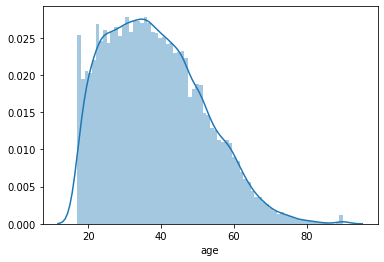

count    30162.000000
mean        38.437902
std         13.134665
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         90.000000
Name: age, dtype: float64


In [18]:
#distributie en statistieken age variabele
sns.distplot(data_set['age'], bins=data_set['age'].nunique())
plt.show()
print(data_set['age'].describe())
min_age = data_set['age'].min()
max_age = data_set['age'].max()

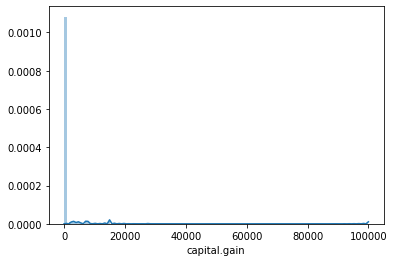

count    30162.000000
mean      1092.007858
std       7406.346497
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital.gain, dtype: float64


In [19]:
#distributie en statistieken capital.gain variabele
sns.distplot(data_set['capital.gain'], bins=data_set['capital.gain'].nunique())
plt.show()
print(data_set['capital.gain'].describe())

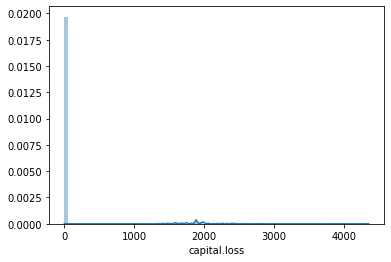

count    30162.000000
mean        88.372489
std        404.298370
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital.loss, dtype: float64


In [20]:
#distributie en statistieken capital.loss variabele
sns.distplot(data_set['capital.loss'], bins=data_set['capital.loss'].nunique())
plt.show()
print(data_set['capital.loss'].describe())

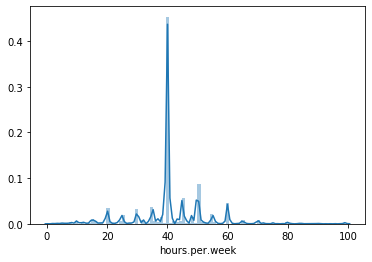

count    30162.000000
mean        40.931238
std         11.979984
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours.per.week, dtype: float64


In [21]:
#distributie en statistieken hours.per.week variabele
sns.distplot(data_set['hours.per.week'], bins=data_set['hours.per.week'].nunique())
plt.show()
print(data_set['hours.per.week'].describe())

Observatie: Er is een aantal personen dat meer dan 40 uur per week werkt. Welke beroepen werken gemiddeld de meeste uren per week? In onderstaande plot is dit onderzocht.

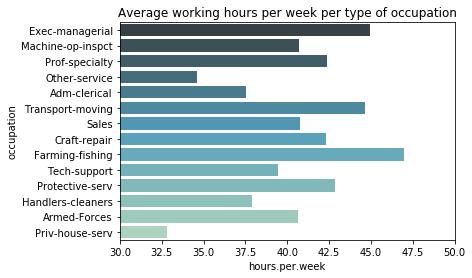

In [22]:
sns.barplot(x=data_set['hours.per.week'], y=data_set['occupation'], ci=None, palette='GnBu_d')
plt.grid(False)
plt.title('Average working hours per week per type of occupation')
plt.xlim([30,50])
plt.show()

### Check op balans van dataset

De 'income' variabele is onze y, de waarde die we willen gaan voorspellen. Met betrekking tot deze variabele checken we of deze in balans is of niet. Dit om te voorkomen dat het model een hoge score haalt door standaard alle datapunten in één categorie te classificeren. 

In [23]:
print(data_set['income'].unique())
print(data_set['income'].value_counts())

['<=50K' '>50K']
<=50K    22654
>50K      7508
Name: income, dtype: int64


De dataset is ongebalanceerd. Hier zullen we later voor moeten corrigeren.

# Data bewerking

De volgende stap is data bewerking. Dit is nodig om de data te prepareren voor de input in de Machine Learning algoritmes.

### Format check variabelen

In [24]:
data_set.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

Aanmaken van labels voor y variabele

In [25]:
data_set['income'] = data_set['income'].map({'<=50K': 0, '>50K': 1}).astype(int)

### Splitsing van y en X variabelen en features (X) kiezen voor model

Onderstaand wijzen we de inkomensvariabele toe aan y. Verder maken we een keuze voor de variabelen die we als features voor het model willen meenemen.

In [29]:
y = data_set['income']
features = data_set.drop('income', axis=1)

model_variabelen = ['age', 'workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'hours.per.week', 'native.country']
X = features[model_variabelen]

### One-hot encoding

One-hot encoding wordt toegepast op categorische variabelen. Zie slidedeck voor een visualisatie.

In [30]:
X_encoded = pd.get_dummies(X, prefix_sep="_")

In [31]:
X_encoded.shape

(30162, 100)

### Splitsing van train en test data

In dit voorbeeld gaan we er van uit dat de complete dataset onze training data is. De data wordt gesplitst naar train en validatie data. De train data wordt gebruikt voor het trainen van het model, m.a.w. het schatten van de model parameters. De validatie data wordt gebruikt voor het finetunen van het model.

In [32]:
X_train, X_val, y_train, y_val = train_test_split(X_encoded,
                                                    y,
                                                    test_size = .2,
                                                    random_state=12)

### Schaling van de data

In onderstaande data wordt er geschaald, zodat alle variabelen zich in dezelfde getallenreeks bevinden.

In [33]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
X_val_scaled = scaler.transform(X_val)

# Feature selectie / engineering

Aan de hand van feature selectie kunnen we inzicht krijgen in de variabelen die belangrijk zijn bij het voorspellen van onze output variabele. 

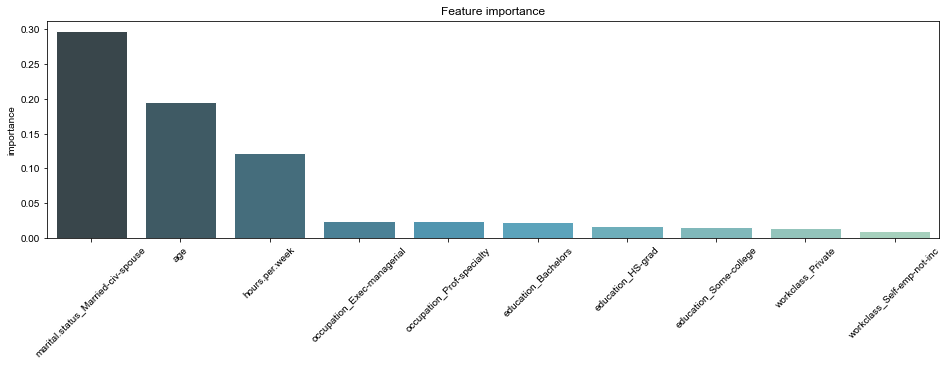

In [34]:
sampler = RandomOverSampler()
X_ros, y_ros = sampler.fit_resample(X_train_scaled, y_train)
X_ros = pd.DataFrame(X_ros, columns=X_train_scaled.columns)

# feature selection
regr = RandomForestRegressor(n_estimators=5,random_state=0)         
regr.fit(X_ros, y_ros)
feature_importances = pd.DataFrame(regr.feature_importances_,index = X_ros.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
#plot
plt.figure(figsize=(16,4))
plt.title('Feature importance')
sns.set(style="whitegrid")
ax = sns.barplot(x=feature_importances.index[0:10], y="importance",palette='GnBu_d', data=feature_importances[0:10])
plt.xticks(rotation=45)
plt.show()

# Model training

### Data preparatie

Zoals eerder geconstateerd hebben we een niet gebalanceerde dataset. Bij het trainen van het model moeten we hier voor corrigeren, zodat beide klassen (income <50k en >50k) met eenzelfde kans voorkomen. Bovendien hebben we veel features. Dit kan ervoor zorgen dat het model 'overfit' kan worden. Dit kunnen we oplossen door een dimensie reductie toe te passen. De techniek die we gebruiken heet Principal Component Analysis (PCA). Deze methode maakt gebruik van de 'eigenvectoren' van de dataset. Het idee is dat de resulterende eigenvectoren een groot deel van de dataset beschrijven a.d.h.v. een lineaire combinatie.

In [35]:
sm = SMOTE(random_state=12, ratio = 1.0)
X_train_res, y_train_res = sm.fit_sample(X_train_scaled, y_train)

In [36]:
pd.Series(y_train_res).value_counts()

1    18079
0    18079
dtype: int64

In [37]:
pca = PCA(n_components=10)
pca.fit(X_train_res)
X_pca_train_res = pca.transform(X_train_res)
X_pca_val = pca.transform(X_val_scaled)

In [38]:
def ConfusionMatrix(y_true, y_pred):

    data = {'y_Predicted': y_pred,
            'y_Actual':    y_true
            }

    df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
    confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
    plt.title('Confusion Matrix', size=20)
    sns.heatmap(confusion_matrix, annot=True, fmt='d')
    
def ROC_curve(y_val, y_pred):    
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    n_classes = 1
    fpr, tpr , thresholds = metrics.roc_curve(y_val, y_pred, pos_label=1)
    roc_auc = metrics.auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

def ClassifierTest(Classifier, data, model_variabelen, schaling, pca_incl, num_pca, age_binning, num_bins, plot_confmatrix=True, plot_roc=True):
    y = data['income']
    features = data.drop('income', axis=1)
    X = features[model_variabelen]
    
    if age_binning:
        size_bin = num_bins
        bins = [i*size_bin for i in range(math.floor(min_age/size_bin),math.ceil(max_age/size_bin)+1)]
        labels = [i for i in range(1,len(bins))]
        X['age'] = pd.cut(X['age'], bins=bins, labels=labels)
    
    X_encoded = pd.get_dummies(X, prefix_sep="_")
    X_train, X_val, y_train, y_val= train_test_split(X_encoded, y, test_size = .2, random_state=12)
    
    if schaling:
        scaler = MinMaxScaler()
        scaler.fit(X_train)
        X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
        X_val = scaler.transform(X_val)
    else:
        X_train_scaled = X_train
    
    sm = SMOTE(random_state=12, ratio = 1.0)
    X_train_res, y_train_res = sm.fit_sample(X_train_scaled, y_train)
        
    if pca_incl == True:
        pca = PCA(n_components=num_pca)
        pca.fit(X_train_res)
        X_train_res = pca.transform(X_train_res)
        X_val = pca.transform(X_val)
        
    clf = Classifier
    clf.fit(X_train_res, y_train_res)
    y_pred_clf = clf.predict(X_val)
    print('Accuracy: {0:.2%}'.format(clf.score(X_val, y_val)))
    print('Recall: {0:.2%}'.format(metrics.recall_score(y_val,y_pred_clf )))
    print('Precision: {0:.2%}'.format(metrics.precision_score(y_val, y_pred_clf)))
    print('F-measure: {0:.2%}'.format(metrics.f1_score(y_val, y_pred_clf))) 
    if plot_confmatrix:
        ConfusionMatrix(y_val, y_pred_clf)
    if plot_roc:
        ROC_curve(y_val, y_pred_clf)
    

### Model training & evaluatie

In onderstaande code worden enkele modellen getraind. Deze modellen zijn classificatie modellen. Voor meer informatie over de modellen verwijzen wij je door naar ons slidedeck of de website van scikit-learn:

- K-Nearest Neighbor: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
- Random Forest: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
- Decision Tree: https://scikit-learn.org/stable/modules/tree.html#classification
- Support Vector Machine: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
- Stochastic Gradient Descent: https://scikit-learn.org/stable/modules/sgd.html#classification

Per model worden er enkele metingen gedaan en wordt er een confusion matrix en AUC-ROC curve geplot:

- Metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9
- Confusion matrix: https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62
- AUC-ROC curve: https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5

#### Random Forest Classifier

Accuracy: 69.14%
Recall: 84.57%
Precision: 42.96%
F-measure: 56.98%


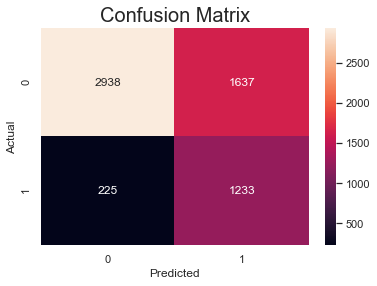

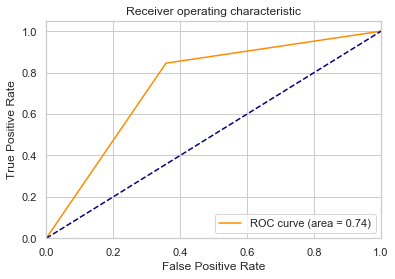

In [39]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=12)
rfc.fit(X_pca_train_res, y_train_res)
y_pred_rfc = rfc.predict(X_pca_val)
print('Accuracy: {0:.2%}'.format(rfc.score(X_pca_val, y_val)))
print('Recall: {0:.2%}'.format(metrics.recall_score(y_val,y_pred_rfc)))
print('Precision: {0:.2%}'.format(metrics.precision_score(y_val,y_pred_rfc)))
print('F-measure: {0:.2%}'.format(metrics.f1_score(y_val,y_pred_rfc)))
ConfusionMatrix(y_val, y_pred_rfc)
ROC_curve(y_val, y_pred_rfc)

#### Nearest Neighbor Classifier

Accuracy: 78.44%
Recall: 68.45%
Precision: 54.27%
F-measure: 60.54%


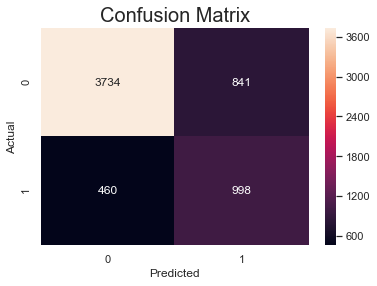

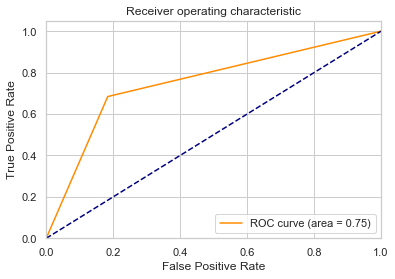

In [51]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_pca_train_res, y_train_res)
y_pred_knn = knn.predict(X_pca_val)
print('Accuracy: {0:.2%}'.format(knn.score(X_pca_val, y_val)))
print('Recall: {0:.2%}'.format(metrics.recall_score(y_val,y_pred_knn)))
print('Precision: {0:.2%}'.format(metrics.precision_score(y_val, y_pred_knn)))
print('F-measure: {0:.2%}'.format(metrics.f1_score(y_val, y_pred_knn)))
ConfusionMatrix(y_val, y_pred_knn)
ROC_curve(y_val, y_pred_knn)

#### Support Vector Machine

Accuracy: 70.56%
Recall: 85.94%
Precision: 44.37%
F-measure: 58.52%


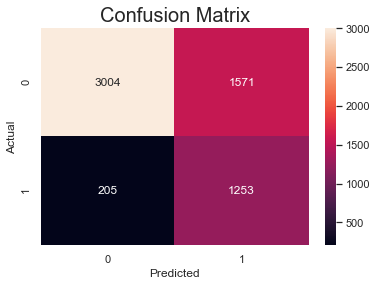

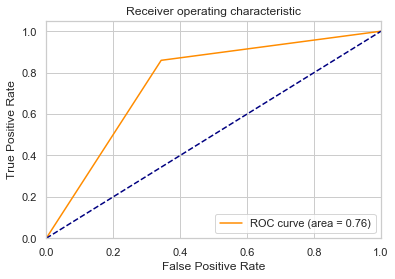

In [56]:
svc = SVC() # Let op: de SVC classifier draaien duurt wat langer dan de andere classifiers.
svc.fit(X_pca_train_res, y_train_res)
y_pred_svc = svc.predict(X_pca_val)
print('Accuracy: {0:.2%}'.format(svc.score(X_pca_val, y_val)))
print('Recall: {0:.2%}'.format(metrics.recall_score(y_val,y_pred_svc)))
print('Precision: {0:.2%}'.format(metrics.precision_score(y_val, y_pred_svc)))
print('F-measure: {0:.2%}'.format(metrics.f1_score(y_val, y_pred_svc)))
ConfusionMatrix(y_val, y_pred_svc)
ROC_curve(y_val, y_pred_svc)

# Zelf aan de slag!

Via onderstaande code kun je zelf aan de slag en proberen om de modellen te verbeteren door het toevoegen van extra parameters. Informatie over modellen:

- K-Nearest Neighbor: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
- Random Forest: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
- Decision Tree: https://scikit-learn.org/stable/modules/tree.html#classification
- Support Vector Machine: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
- Stochastic Gradient Descent: https://scikit-learn.org/stable/modules/sgd.html#classification


##### Korte uitleg 'binning'

In onderstaande code heb je onder andere de keuze om 'binning' toe te passen op de 'age' variabele. Deze optie zorgt ervoor dat deze variabele wordt omgezet naar labels. Leeftijd 42 valt bijvoorbeeld in het bin (40,45], enz.. Tevens is er de keuze om aan te geven hoe groot de bins zijn, bijvoorbeeld 5 jaar.

In [ ]:
# kies hier de classifier die je wil gebruiken en pas de parameters naar keuze aan!
classifier = KNeighborsClassifier(n_neighbors=3) 

# kies je model variabelen
model_variabelen_func = ['age', 'workclass', 'education', 'marital.status', 'occupation', 'relationship',\
                        'race', 'sex', 'hours.per.week', 'native.country'] 

#schaling van de numerieke variabelen ja (True) of nee (False)?
schaling = True

#Dimensie reductie ja (True) of nee (False) en indien ja, hoeveel dimensies?
pca_incl = True
num_pca = 10

#Binning van 'age' variabele ja (True) of nee (False) en indien ja, hoeveel bins? 
age_binning = False
size_bins = 30

#plotten van confusionmatrix en roc curve ja (True) of nee (False)
plot_cfm = True #confusionmatrix
plot_roc = True #ROC curve


ClassifierTest(classifier, data_set, model_variabelen_func, schaling, pca_incl, num_pca, age_binning, size_bins, plot_cfm, plot_roc)